# Libraries

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation 

In [7]:
train_f_df = pd.read_csv('train_features.csv')
test_f_df = pd.read_csv('test_features.csv')
train_sal_df = pd.read_csv('train_salaries.csv')

Verify data is loaded:

In [8]:
train_f_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [9]:
test_f_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [10]:
train_sal_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


Check the length and dtypes of the loaded dataframes:

In [11]:
train_f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [12]:
train_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [13]:
test_f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


check the shape of the dataframes:

In [14]:
#shape of the data
print(train_f_df.shape)
print(train_sal_df.shape)
print(test_f_df.shape)

(1000000, 8)
(1000000, 2)
(1000000, 8)


Merge salary information from the train_sal_df with train_f_df

In [15]:
#merge train_features.csv and train_salaries.csv
train_df = pd.merge(train_f_df, train_sal_df, on = 'jobId')

In [16]:
#check the merged data frame
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [17]:
#shape of merged data
print(train_df.shape)

(1000000, 9)


Check for missing values:

In [18]:
#store the sum of missing values in each column - 
missing_val = train_df.isnull().sum()
missing_val

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

Data Cleaning:

In [19]:
#store the the salaries in the training data which are less than or equal to 0
zero_sal = train_df['salary']<=0
inval = train_df[zero_sal]
inval

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [21]:
#check if any duplicates and remove them
clean_df = train_df.drop_duplicates(subset='jobId')
print(clean_df.shape)

(1000000, 9)


In [20]:
def remove_zerosal(df):
    new_df = df[df.salary>0]
    return new_df

In [22]:
new_train_df = remove_zerosal(train_df)

In [23]:
print(new_train_df.shape)

(999995, 9)


In [24]:
#Reset the index values after dropping the invalid values 
new_train_df.reset_index(drop = True)
new_train_df.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999999,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


# Exploratory Data Analysis:

In [25]:
new_train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [26]:
#categorical data
cat_data = ['companyId', 'jobType', 'degree', 'major', 'industry']

for c in cat_data:
    print(new_train_df[c].value_counts())

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64
SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


# Visualize AND Analyse the target variable(Salary)

In [27]:
stats = new_train_df['salary'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_bound, lower_bound))

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


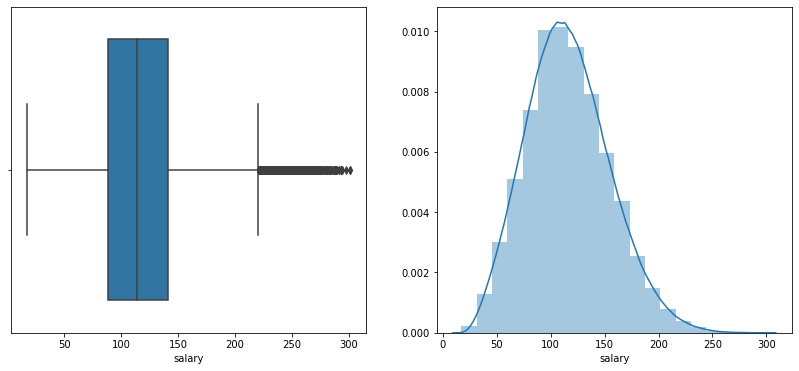

In [28]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(new_train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(new_train_df['salary'], bins = 20)
plt.show()

In [29]:
#compute the kurtosis and skewness of salary
print('Salary Skewness:', new_train_df['salary'].skew())
print('Salary Kurtosis:', new_train_df['salary'].kurt())
print('\n')
if -0.5 <= new_train_df['salary'].skew() <= 0.5:
    print('Salary distribution is approximately symmetric')
elif -0.5 >  new_train_df['salary'] > 0.5:
    print('Salary distribution is skewed')


Salary Skewness: 0.34652727907668734
Salary Kurtosis: -0.025750772283374967


Salary distribution is approximately symmetric


From the above analysis the target variable salary is normally distributed.
    

In [31]:
#Check outlier below lower bound
new_train_df[new_train_df['salary']<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [32]:
#Check outlier above the upper bound
new_train_df[new_train_df['salary']>220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [33]:
#Check outliers with jobtype - 
new_train_df.loc[new_train_df['salary'] > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

<b> The high salary potential outliers seem to be C-level executives who are known to have higher salaries. 
Hence, we do not drop them as they seem appropriate. </b>

# Relationship between independent and dependent variables

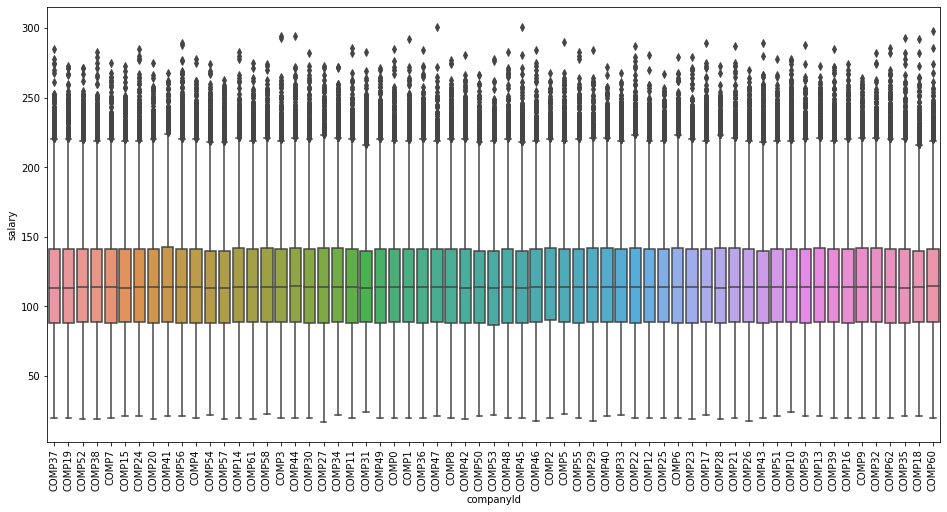

In [38]:
#box plot companyId/salary
var = 'companyId'
data = pd.concat([new_train_df['salary'], new_train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="salary", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)
plt.show()

From the above box plot, we can say that companyId (independent variable) shows salary(dependent variable) are evenly distributed 
from company to company and does not be seem to be a good predictor for salary.

Therefore JobId and CompanyId are not good for predictions and should be removed from the training data.

In [42]:
#dropping jobId and companyID variables
new_train_df.drop('jobId', axis=1, inplace=True)
new_train_df.drop('companyId', axis=1, inplace=True)

new_train_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Visualizing which categorical independent variable(milesFromMetropolis and yearsExperience) may effect salary.

In [48]:
#def a function ViolinPlot to visualize categorical data
def ViolinPlot(data, var):
    data = pd.concat([new_train_df['salary'], new_train_df[var]], axis=1)
    f, ax = plt.subplots(figsize=(12, 8))
    fig = sns.violinplot(x=var, y='salary', data=data, scale='count', inner='quartile')
    plt.xticks(rotation=75)

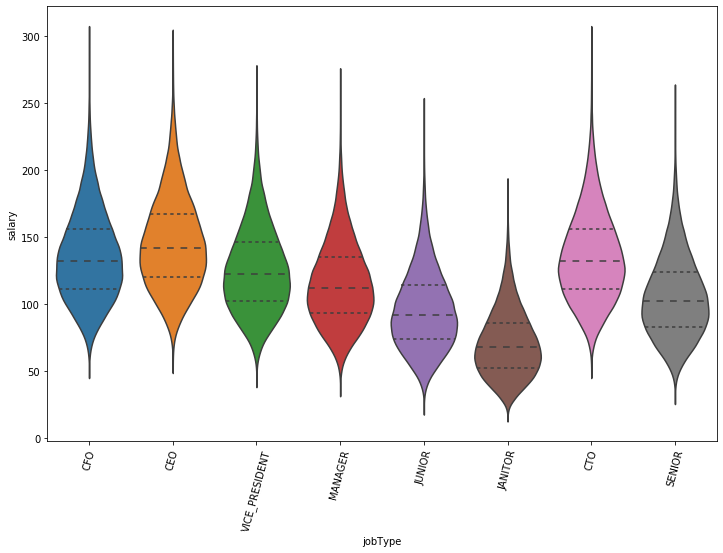

In [49]:
ViolinPlot(new_train_df, 'jobType')


From the aobve figure we can see a positive correlation between jobType and salary. 
The highest salaries are CEO, followed by CTO and followed by CFO
The lowest salary is for the jobtype Janitor. Distributions appear normal.

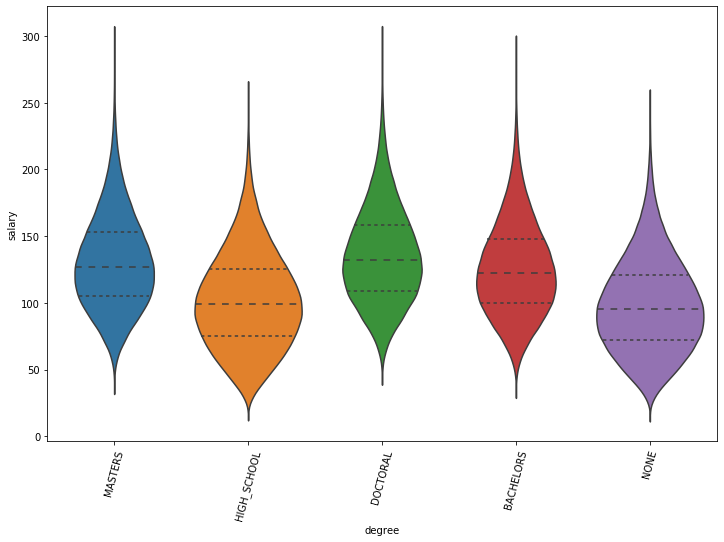

In [50]:
ViolinPlot(new_train_df, 'degree')


From the above figure, we can say Salary seems to increase with the advance in degrees.
We can see that having a college degree corresponds to having higher salaries than high school or no degree
Distribution appear normal.

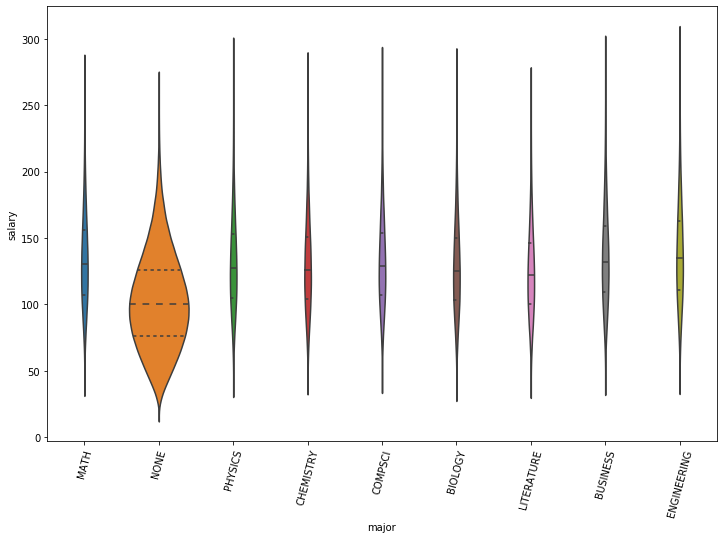

In [51]:
ViolinPlot(new_train_df, 'major')

From the above figure, people with majors such as engineering, business and math have higher salaries.

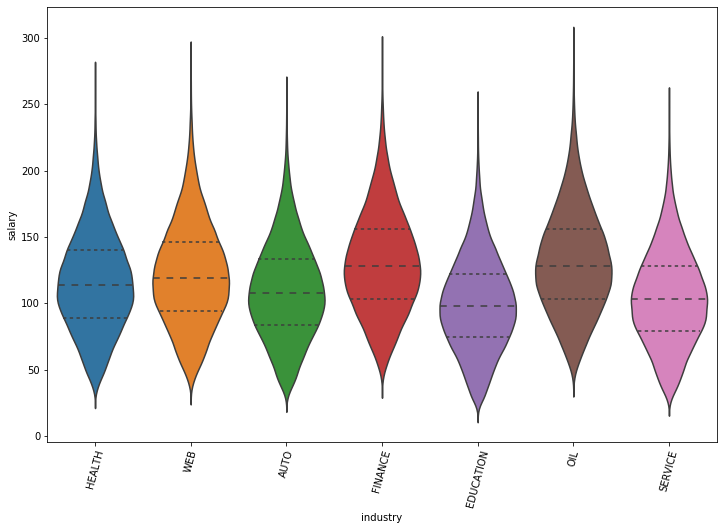

In [52]:
ViolinPlot(new_train_df, 'industry')

From the above figure, people who work in Industries such as Oil pay the highest, followed by finance and web. Education industry seems to pay the lowest.

<b>Visualizaing effect of variables numeric independent variable(milesFromMetropolis and yearsExperience) on salary.</b>

In [58]:
#def functions
#scatter plots
def scatter_plot(df, col):
    plt.figure(figsize = (12,8))
    plt.scatter(df[col], df['salary'] )
    plt.ylabel('salary')
    plt.xlabel(col)
    
#regression plots
def reg_plot(df, col):
    plt.figure(figsize=(12,8))
    sns.regplot(x=df[col], y = df['salary'], data = df, line_kws = {'color' : 'red'})    
    plt.ylim(0,)
    
#residual plots 
def res_plot(df,col):
    plt.figure(figsize=(12,8))
    sns.residplot(x=df[col], y = df['salary'], data = df)
    plt.show()


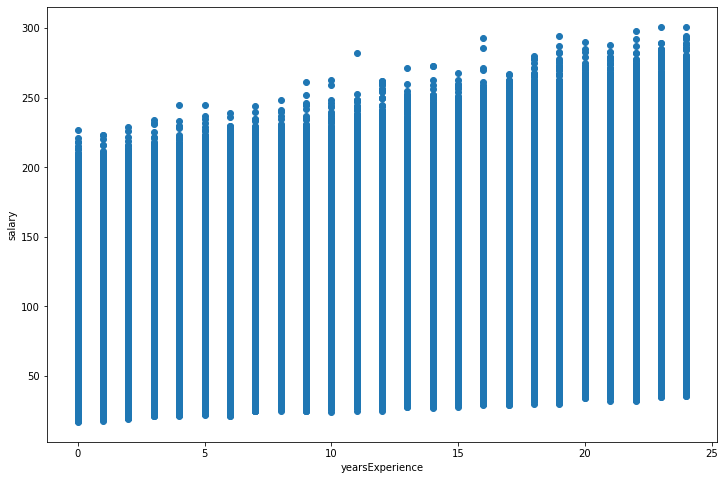

In [57]:
#scatter plot salary/yearsExperience
scatter_plot(new_train_df, 'yearsExperience')

In [ ]:
#Fit a regression line to years experience to visualize it as a predictor of salary - 
reg_plot(new_train_df, 'yearsExperience')